#  Project Title: Problem for Covid - 19 Data Analysis Project using Python

# Importing all the essential libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# 1. Import the dataset using Pandas

In [2]:
url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


# 2. High Level Data Understanding

In [3]:
# a. Finding the no. of rows & columns in the dataset
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

# b. Data types of columns
print(df.dtypes)

# c. Info & describe of data in dataframe
print(df.info())
print(df.describe())

Number of rows: 57394
Number of columns: 49
iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million           

# 3. Low Level Data Understanding

In [4]:
# a. Finding the count of unique values in location column
unique_locations = df['location'].nunique()
print(f"Count of unique values in 'location' column: {unique_locations}")

# b. Finding which continent has maximum frequency using value_counts
continent_max_freq = df['continent'].value_counts().idxmax()
print(f"Continent with maximum frequency: {continent_max_freq}")

# c. Finding maximum & mean value in 'total_cases'
max_total_cases = df['total_cases'].max()
mean_total_cases = df['total_cases'].mean()
print(f"Maximum total cases: {max_total_cases}")
print(f"Mean total cases: {mean_total_cases}")

# d. Finding 25%, 50% & 75% quartile value in 'total_deaths'
total_deaths_quartiles = df['total_deaths'].quantile([0.25, 0.5, 0.75])
print(f"25%, 50%, 75% quartile values in 'total_deaths': {total_deaths_quartiles}")

# e. Finding which continent has maximum 'human_development_index'
continent_max_hdi = df.groupby('continent')['human_development_index'].idxmax()
print(f"Continent with maximum 'human_development_index': {continent_max_hdi}")

# f. Finding which continent has minimum 'gdp_per_capita'
continent_min_gdp = df.groupby('continent')['gdp_per_capita'].idxmin()
print(f"Continent with minimum 'gdp_per_capita': {continent_min_gdp}")

Count of unique values in 'location' column: 216
Continent with maximum frequency: Europe
Maximum total cases: 55154651.0
Mean total cases: 167797.3688753302
25%, 50%, 75% quartile values in 'total_deaths': 0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64
Continent with maximum 'human_development_index': continent
Africa           45238
Asia             23351
Europe           38632
North America     9451
Oceania           2701
South America    10749
Name: human_development_index, dtype: int64
Continent with minimum 'gdp_per_capita': continent
Africa           10259
Asia             56040
Europe           34054
North America    22859
Oceania          46810
South America     6367
Name: gdp_per_capita, dtype: int64


# 4. Filtering the dataframe with specified columns

In [5]:
df = df[['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']]
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498


# 5. Data Cleaning

In [6]:

# a. Removing all duplicate observations
df = df.drop_duplicates()

# b. Finding missing values in all columns
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# c. Removing all observations where continent column value is missing
df = df.dropna(subset=['continent'])

# d. Filling all missing values with 0
df = df.fillna(0)

Missing values in each column:
continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64


# 6. Date time formatting

In [7]:

# a. Converting the date column in datetime format
df['date'] = pd.to_datetime(df['date'])
print('Date-column \n', df['date'])

# b. Creating the new column 'month' after extracting month data from date column
df['month'] = df['date'].dt.month
print('Month-column \n', df['month'])

Date-column 
 0       2019-12-31
1       2020-01-01
2       2020-02-01
3       2020-03-01
4       2020-04-01
           ...    
56743   2020-11-13
56744   2020-11-14
56745   2020-11-15
56746   2020-11-16
56747   2020-11-17
Name: date, Length: 56748, dtype: datetime64[ns]
Month-column 
 0        12
1         1
2         2
3         3
4         4
         ..
56743    11
56744    11
56745    11
56746    11
56747    11
Name: month, Length: 56748, dtype: int32


# 7. Data Aggregation

In [8]:
# a. Finding max value in all columns using groupby function on 'continent' column
df_groupby = df.groupby('continent').max().reset_index()
df_groupby


,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


# 8. Feature Engineering

In [9]:
# a. Creating a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']
df_groupby['total_deaths_to_total_cases']

0    0.027004
1    0.014708
2    0.026188
3    0.022062
4    0.032685
5    0.028251
Name: total_deaths_to_total_cases, dtype: float64

# 9. Data Visualization

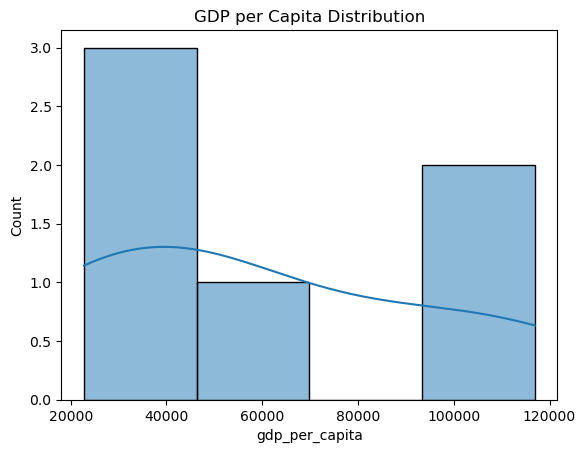

In [10]:
# a. Performing the Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot
sns.histplot(df_groupby['gdp_per_capita'], kde=True)
plt.title('GDP per Capita Distribution')
plt.show()


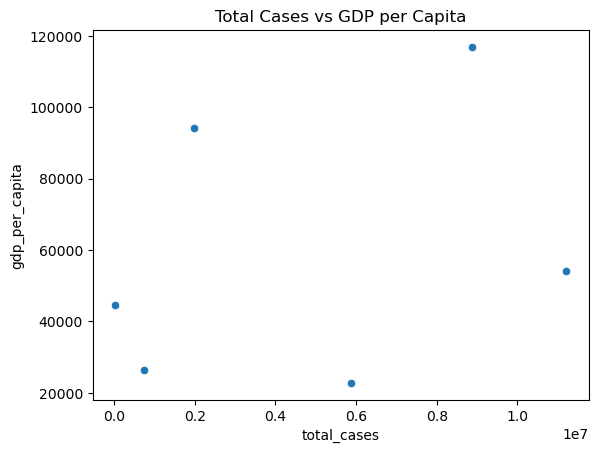

In [11]:
# b. Plotting a scatter plot of 'total_cases' & 'gdp_per_capita'
sns.scatterplot(x='total_cases', y='gdp_per_capita', data=df_groupby)
plt.title('Total Cases vs GDP per Capita')
plt.show()


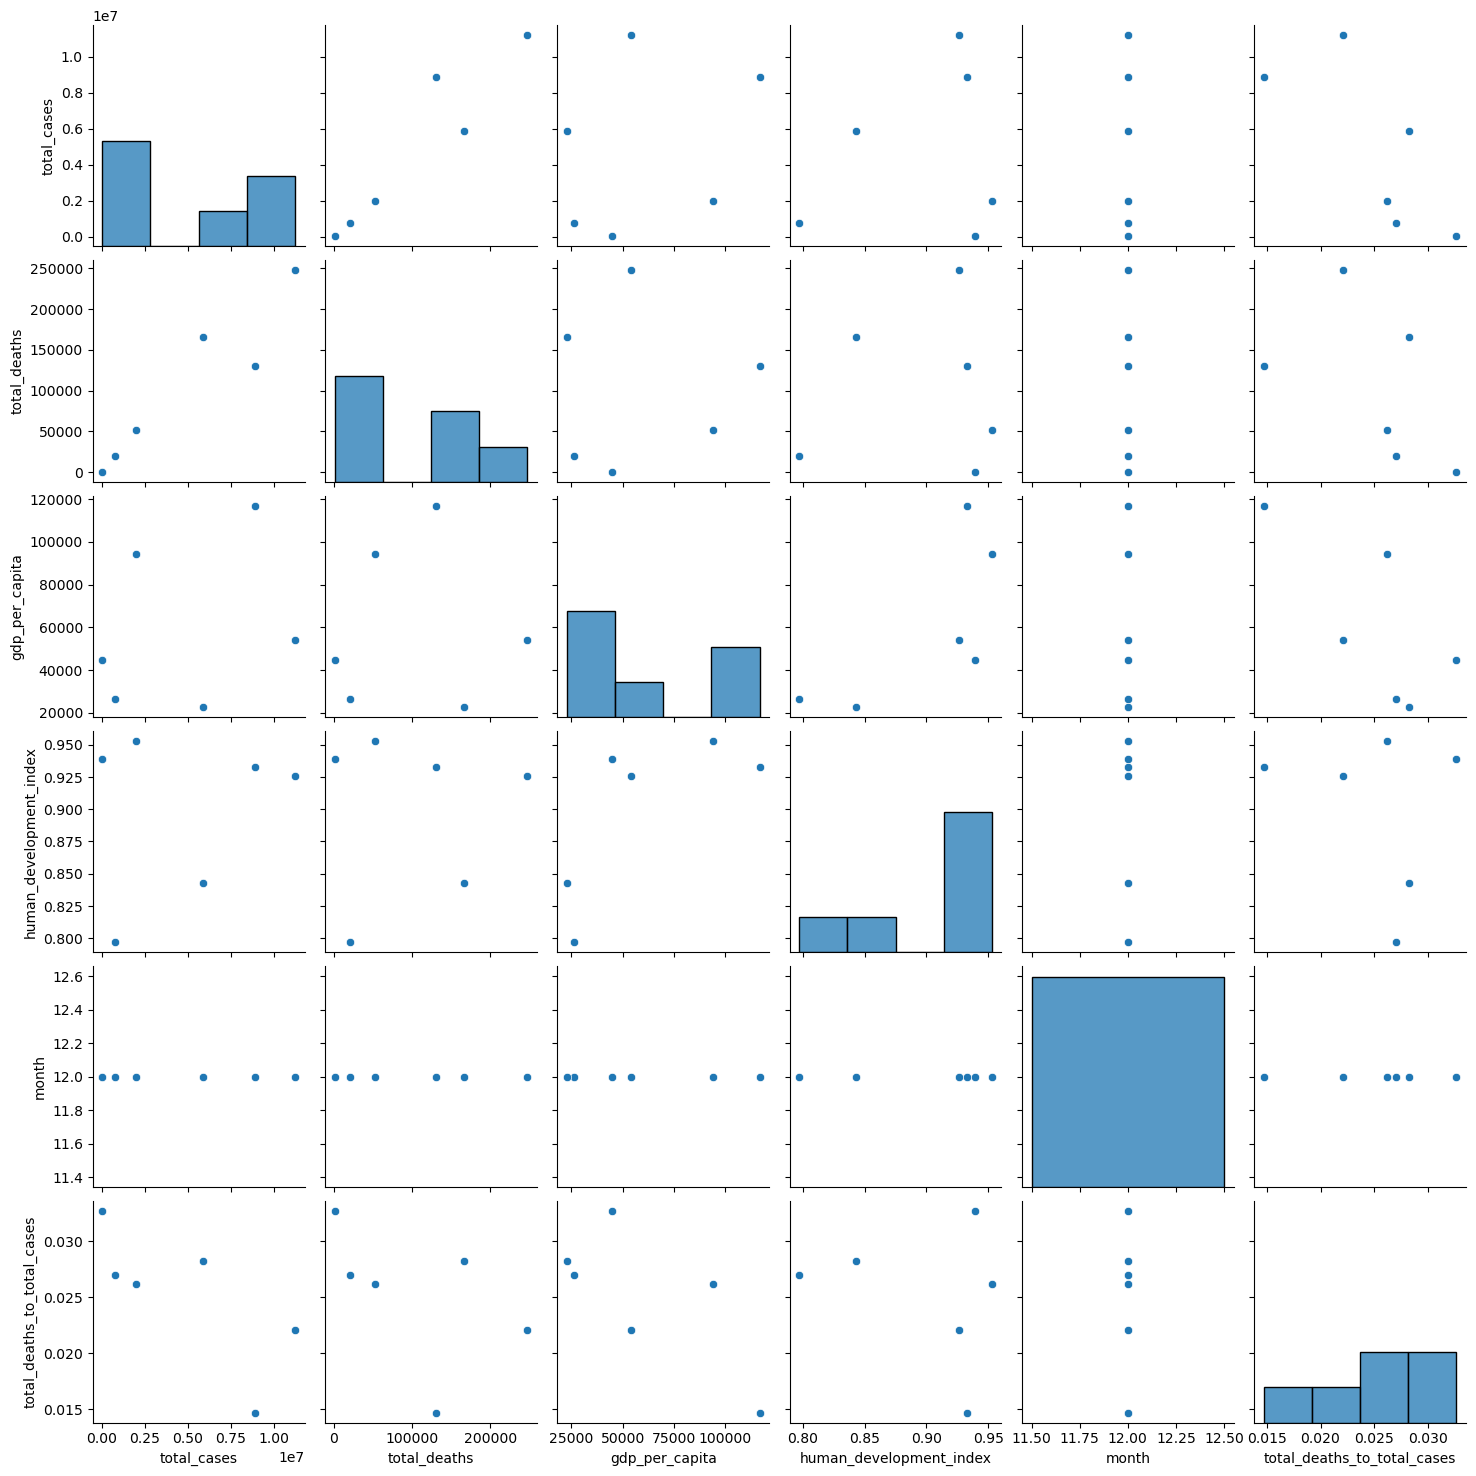

In [12]:
# c. Plotting the Pairplot on df_groupby dataset
sns.pairplot(df_groupby)
plt.show()

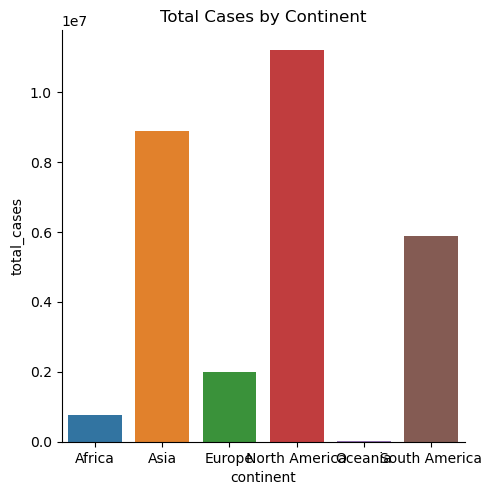

In [13]:
# d. Plotting a bar plot of 'continent' column with 'total_cases'
sns.catplot(x='continent', y='total_cases', data=df_groupby, kind='bar')
plt.title('Total Cases by Continent')
plt.show()

## 10. Saving the df_groupby dataframe in your local drive using pandas.to_csv function

In [14]:
saved_work = df_groupby.to_csv('df_groupby.csv', index=False)